In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import mpl
import matplotlib

%matplotlib inline

sns.set_style('darkgrid')
mpl.rcParams['figure.figsize'] = (8, 5)

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 1. 数据获取 

In [3]:
## The data has been selected, containing LendingClub loan data for accepted
data = pd.read_csv("loan_selection_2007-2018_new.csv",index_col=0)
data.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,chargeoff_within_12_mths,pub_rec_bankruptcies,loan_status
0,3600.0,36 months,13.99,C,10+ years,MORTGAGE,55000.0,Not Verified,debt_consolidation,PA,5.91,1.0,7.0,0.0,2765.0,29.7,13.0,0.0,0.0,Fully Paid
1,24700.0,36 months,11.99,C,10+ years,MORTGAGE,65000.0,Not Verified,small_business,SD,16.06,4.0,22.0,0.0,21470.0,19.2,38.0,0.0,0.0,Fully Paid
2,20000.0,60 months,10.78,B,10+ years,MORTGAGE,63000.0,Not Verified,home_improvement,IL,10.78,0.0,6.0,0.0,7869.0,56.2,18.0,0.0,0.0,Fully Paid
4,10400.0,60 months,22.45,F,3 years,MORTGAGE,104433.0,Source Verified,major_purchase,PA,25.37,3.0,12.0,0.0,21929.0,64.5,35.0,0.0,0.0,Fully Paid
5,11950.0,36 months,13.44,C,4 years,RENT,34000.0,Source Verified,debt_consolidation,GA,10.20,0.0,5.0,0.0,8822.0,68.4,6.0,0.0,0.0,Fully Paid


In [4]:
# detective data analysis
data.info()
data.describe(include=[np.object]) # 查看非离散变量的描述性统计
# data.describe(exclude=[np.object])# 查看连续变量的描述性统计
data.loan_status.unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611782 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   loan_amnt                 611782 non-null  float64
 1   term                      611782 non-null  object 
 2   int_rate                  611782 non-null  float64
 3   grade                     611782 non-null  object 
 4   emp_length                573223 non-null  object 
 5   home_ownership            611782 non-null  object 
 6   annual_inc                611782 non-null  float64
 7   verification_status       611782 non-null  object 
 8   purpose                   611782 non-null  object 
 9   addr_state                611782 non-null  object 
 10  dti                       611564 non-null  float64
 11  inq_last_6mths            611782 non-null  float64
 12  open_acc                  611782 non-null  float64
 13  pub_rec                   611782 non-null  

C:\Users\weiji\AppData\Local\Temp\ipykernel_12344\1707975293.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.describe(include=[np.object]) # 查看非离散变量的描述性统计


,term,grade,emp_length,home_ownership,verification_status,purpose,addr_state,loan_status
count,611782,611782,573223,611782,611782,611782,611782,611782
unique,2,7,11,5,3,14,50,2
top,36 months,C,10+ years,MORTGAGE,Source Verified,debt_consolidation,CA,Fully Paid
freq,466551,174804,202275,298507,261738,354477,86062,482595


array(['Fully Paid', 'Charged Off'], dtype=object)

### 特征描述
    loan_amnt 贷款申请金额
    fund_amnt 授信金额
    term 贷款期限
    int_rate 贷款利率
    installment 每次支付金额(分期付款)
    grade 贷款授信等级
    emp_length 工作年限
    home_ownership : The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
    annual_inc 客户提供的年收入
    verification_status  指示共同借款人的共同收入是否经信用证核实，未核实，或收入来源是否核实
    purpose 贷款用途
    dti  DTI全称Debt to Income Ratios（通常缩写为DTI），是反映贷款者还贷能力的重要工具
    inqLast6Mths 过去6个月的查询次数(不包括汽车及按揭贷款查询)
    open_acc  借款人信用档案中开放的信用额度的数量
    pub_rec  失信记录数量
    revol_bal 信贷循环余额总额
    revol_util 循环额度利用率
    total_acc 目前在借款人信用档案中的信用额度总数
    chargeoff_within_12_mths 过去12个月坏账（冲销）记录
    pub_rec_bankruptcies  公共破产记录
    loan_status 贷款类型

## 2. 数据预处理

### 空值处理

In [5]:
# 空值检测
data.isnull().sum()
# data.dropna(axis=0, inplace=True)
# data.isnull().sum()
# data.shape
data.loan_status.unique()

loan_amnt                       0
term                            0
int_rate                        0
grade                           0
emp_length                  38559
home_ownership                  0
annual_inc                      0
verification_status             0
purpose                         0
addr_state                      0
dti                           218
inq_last_6mths                  0
open_acc                        0
pub_rec                         0
revol_bal                       0
revol_util                    326
total_acc                       0
chargeoff_within_12_mths        0
pub_rec_bankruptcies            0
loan_status                     0
dtype: int64

array(['Fully Paid', 'Charged Off'], dtype=object)

##### 1. emp_length

In [6]:
# 众数填充 emp_length
data.emp_length.fillna(data.emp_length.mode()[0], inplace=True)
data.describe(include=[np.object])
data.isnull().sum()

C:\Users\weiji\AppData\Local\Temp\ipykernel_12344\406612271.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.describe(include=[np.object])


,term,grade,emp_length,home_ownership,verification_status,purpose,addr_state,loan_status
count,611782,611782,611782,611782,611782,611782,611782,611782
unique,2,7,11,5,3,14,50,2
top,36 months,C,10+ years,MORTGAGE,Source Verified,debt_consolidation,CA,Fully Paid
freq,466551,174804,240834,298507,261738,354477,86062,482595


loan_amnt                     0
term                          0
int_rate                      0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
purpose                       0
addr_state                    0
dti                         218
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                  326
total_acc                     0
chargeoff_within_12_mths      0
pub_rec_bankruptcies          0
loan_status                   0
dtype: int64

<AxesSubplot:xlabel='loan_status', ylabel='count'>

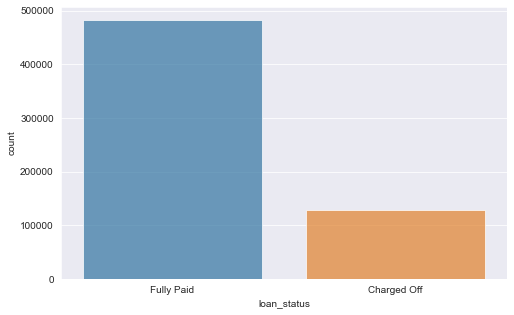

In [7]:
# 观察预测目标数据
sns.countplot(x='loan_status', data=data, alpha=0.7)

In [8]:
data.groupby(by = "loan_status")["loan_status"].count()

loan_status
Charged Off    129187
Fully Paid     482595
Name: loan_status, dtype: int64

In [9]:
data.groupby(by = ["term","loan_status"])["loan_status"].count()

term        loan_status
 36 months  Charged Off     77925
            Fully Paid     388626
 60 months  Charged Off     51262
            Fully Paid      93969
Name: loan_status, dtype: int64

In [10]:
from pandas.api.types import CategoricalDtype

In [11]:
# 将 emp_length 列设置为有序分类数据
emp_length_dtype = CategoricalDtype(categories=['< 1 year', '1 year', '2 years', '3 years',
       '4 years', '5 years', '6 years', '7 years',  '8 years', '9 years', '10+ years'], ordered=True)
data['emp_length'] = data['emp_length'].astype(emp_length_dtype)
data['emp_length'].head()

0    10+ years
1    10+ years
2    10+ years
4      3 years
5      4 years
Name: emp_length, dtype: category
Categories (11, object): ['< 1 year' < '1 year' < '2 years' < '3 years' ... '7 years' < '8 years' < '9 years' < '10+ years']

#### 2.grade 

In [12]:
# grade 数据类型转换
from pandas.api.types import CategoricalDtype
data['grade'] = data['grade'].astype(CategoricalDtype(ordered=True))# 将 grade 列设置为有序分类数据
data.grade.head()

0    C
1    C
2    B
4    F
5    C
Name: grade, dtype: category
Categories (7, object): ['A' < 'B' < 'C' < 'D' < 'E' < 'F' < 'G']

#### 3.ownership

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE'], dtype=object)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

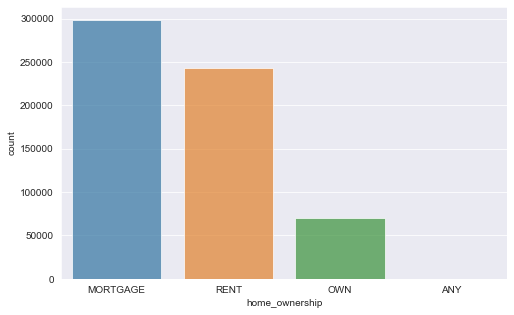

In [13]:
data.home_ownership.unique()
# 观察预测目标数据
data.home_ownership.replace("NONE","ANY",inplace = True)
sns.countplot(x='home_ownership', data=data, alpha=0.7)

#### 4.verif_status

In [14]:
data.verification_status.unique()
# 将 verification_status 列设置为有序分类数据
verification_status_dtype = CategoricalDtype(categories=['Verified', 'Source Verified', 'Not Verified'], ordered=True)
data['verification_status'] = data['verification_status'].astype(verification_status_dtype)
data['verification_status'].head()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

0       Not Verified
1       Not Verified
2       Not Verified
4    Source Verified
5    Source Verified
Name: verification_status, dtype: category
Categories (3, object): ['Verified' < 'Source Verified' < 'Not Verified']

#### 5.purpose

In [15]:
data.purpose.unique()

array(['debt_consolidation', 'small_business', 'home_improvement',
       'major_purchase', 'credit_card', 'other', 'house', 'vacation',
       'car', 'medical', 'moving', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

In [16]:
data.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
purpose                       0
addr_state                    0
dti                         218
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                  326
total_acc                     0
chargeoff_within_12_mths      0
pub_rec_bankruptcies          0
loan_status                   0
dtype: int64

In [17]:
#### 6.dti,revol_util

In [18]:
cnt_columns = ['dti', 'revol_util']
# 使用各列中的平均值对空值进行填充
data[cnt_columns] = data[cnt_columns].apply(lambda s: s.fillna(s.mean()))
# 使用 annual_inc 列的中位数对空值进行填充
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611782 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   loan_amnt                 611782 non-null  float64 
 1   term                      611782 non-null  object  
 2   int_rate                  611782 non-null  float64 
 3   grade                     611782 non-null  category
 4   emp_length                611782 non-null  category
 5   home_ownership            611782 non-null  object  
 6   annual_inc                611782 non-null  float64 
 7   verification_status       611782 non-null  category
 8   purpose                   611782 non-null  object  
 9   addr_state                611782 non-null  object  
 10  dti                       611782 non-null  float64 
 11  inq_last_6mths            611782 non-null  float64 
 12  open_acc                  611782 non-null  float64 
 13  pub_rec                   61

In [19]:
data.dtypes 
'annual_inc', 'revol_bal','dti', 'pub_rec', 'revol_bal'

loan_amnt                    float64
term                          object
int_rate                     float64
grade                       category
emp_length                  category
home_ownership                object
annual_inc                   float64
verification_status         category
purpose                       object
addr_state                    object
dti                          float64
inq_last_6mths               float64
open_acc                     float64
pub_rec                      float64
revol_bal                    float64
revol_util                   float64
total_acc                    float64
chargeoff_within_12_mths     float64
pub_rec_bankruptcies         float64
loan_status                   object
dtype: object

('annual_inc', 'revol_bal', 'dti', 'pub_rec', 'revol_bal')

In [20]:
data.nunique() ## 查看元素出现频次

loan_amnt                    1519
term                            2
int_rate                      265
grade                           7
emp_length                     11
home_ownership                  4
annual_inc                  35807
verification_status             3
purpose                        14
addr_state                     50
dti                          6182
inq_last_6mths                  7
open_acc                       81
pub_rec                        29
revol_bal                   67625
revol_util                   1225
total_acc                     136
chargeoff_within_12_mths       11
pub_rec_bankruptcies           11
loan_status                     2
dtype: int64

array([[<AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'int_rate'}>,
        <AxesSubplot:title={'center':'annual_inc'}>],
       [<AxesSubplot:title={'center':'dti'}>,
        <AxesSubplot:title={'center':'inq_last_6mths'}>,
        <AxesSubplot:title={'center':'open_acc'}>],
       [<AxesSubplot:title={'center':'pub_rec'}>,
        <AxesSubplot:title={'center':'revol_bal'}>,
        <AxesSubplot:title={'center':'revol_util'}>],
       [<AxesSubplot:title={'center':'total_acc'}>,
        <AxesSubplot:title={'center':'chargeoff_within_12_mths'}>,
        <AxesSubplot:title={'center':'pub_rec_bankruptcies'}>]],
      dtype=object)

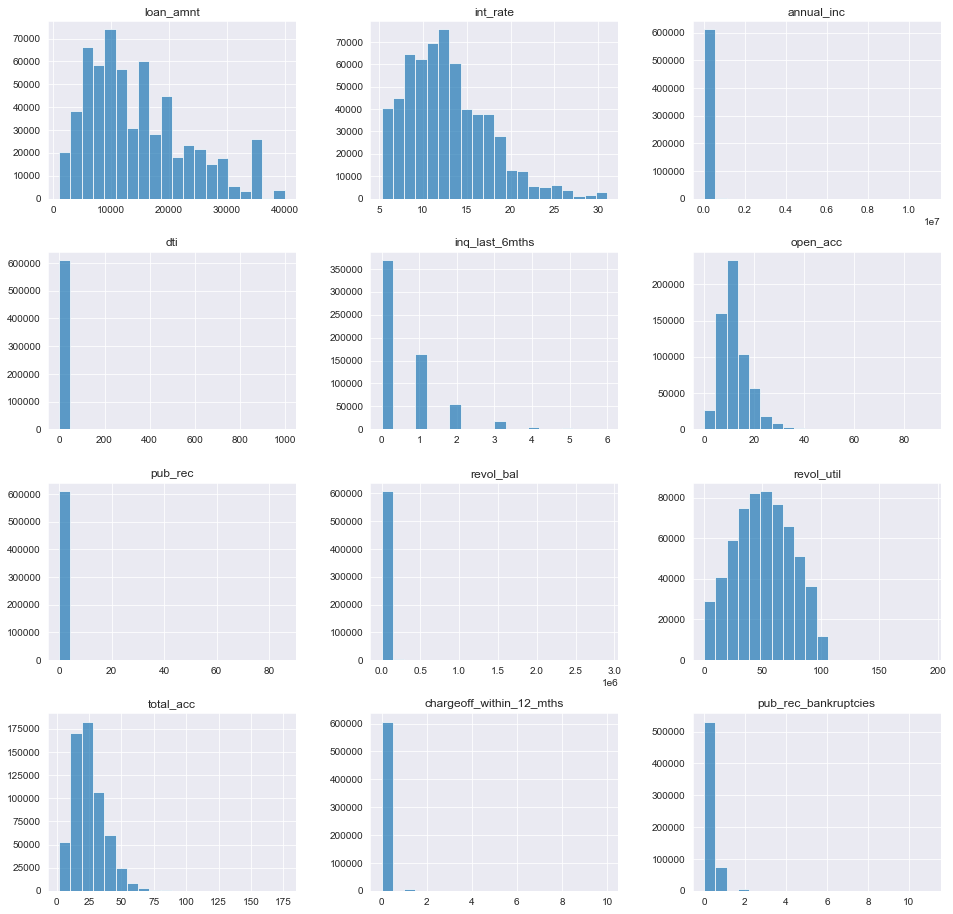

In [21]:
# 观察数值数据分布情况
data.select_dtypes(include=[np.number]).hist(alpha=0.7, figsize=(16,16), bins=20)

In [22]:
data.dti[data.dti>200]

8721       999.00
66461      380.53
73833      672.52
423022     531.33
423338     359.69
            ...  
982080     999.00
1022667    447.60
1028983    215.88
1037693    218.59
1038269    321.74
Name: dti, Length: 102, dtype: float64

## 异常值处理

In [23]:
# 可能存在问题的数据列
q_columns =['annual_inc', 'revol_bal','dti', 'pub_rec']

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

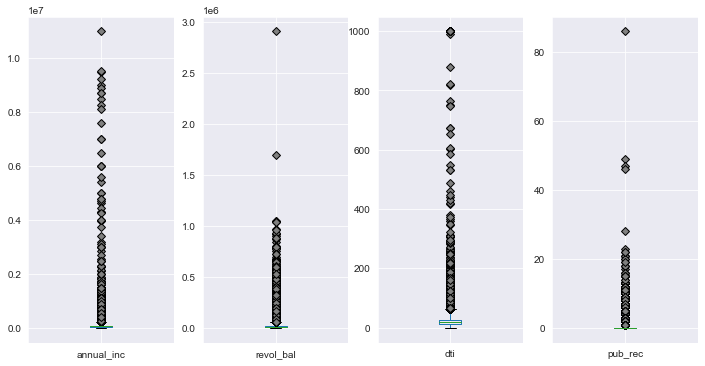

In [24]:
# 观察存疑数据列的 boxplot
fig, axes = plt.subplots(1, 4, figsize=(12,6))

column_ax = zip(q_columns, axes)

for col, ax in column_ax:
    data.boxplot(column=[col], ax=ax, whis=3, flierprops={'marker':'D', 'markerfacecolor':'grey'})

In [25]:
# 定义回调函数，去除每列数据中的异常值，异常值为均值两边超过三个标准差的数据
def exclude_extreme(s):
    mean = s.mean()
    sigma = s.std()
    ceiling = mean + 3 * sigma
    floor = mean - 3 * sigma
    s_copy = s.copy()
    s_copy[s_copy > ceiling] = ceiling
    s_copy[s < s_copy] = floor
    return s_copy

In [26]:
# 替换制定列的异常值
# 可能存在问题的数据列
q_columns =['annual_inc','dti', 'pub_rec', 'revol_bal']

data.loc[:, ['dti']] = data.loc[:, ['dti']].apply(exclude_extreme)
data.loc[:, ['annual_inc']] = data.loc[:, ['annual_inc']].apply(exclude_extreme)
data.loc[:, ['pub_rec']] = data.loc[:, ['pub_rec']].apply(exclude_extreme)

In [27]:
data.loc[:, ['revol_bal']] = data.loc[:, ['revol_bal']].apply(exclude_extreme)
data.loc[:, ['pub_rec_bankruptcies']] = data.loc[:, ['pub_rec_bankruptcies']].apply(exclude_extreme)
data.loc[:, ['chargeoff_within_12_mths']] = data.loc[:, ['chargeoff_within_12_mths']].apply(exclude_extreme)

array([[<AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'int_rate'}>,
        <AxesSubplot:title={'center':'annual_inc'}>],
       [<AxesSubplot:title={'center':'dti'}>,
        <AxesSubplot:title={'center':'inq_last_6mths'}>,
        <AxesSubplot:title={'center':'open_acc'}>],
       [<AxesSubplot:title={'center':'pub_rec'}>,
        <AxesSubplot:title={'center':'revol_bal'}>,
        <AxesSubplot:title={'center':'revol_util'}>],
       [<AxesSubplot:title={'center':'total_acc'}>,
        <AxesSubplot:title={'center':'chargeoff_within_12_mths'}>,
        <AxesSubplot:title={'center':'pub_rec_bankruptcies'}>]],
      dtype=object)

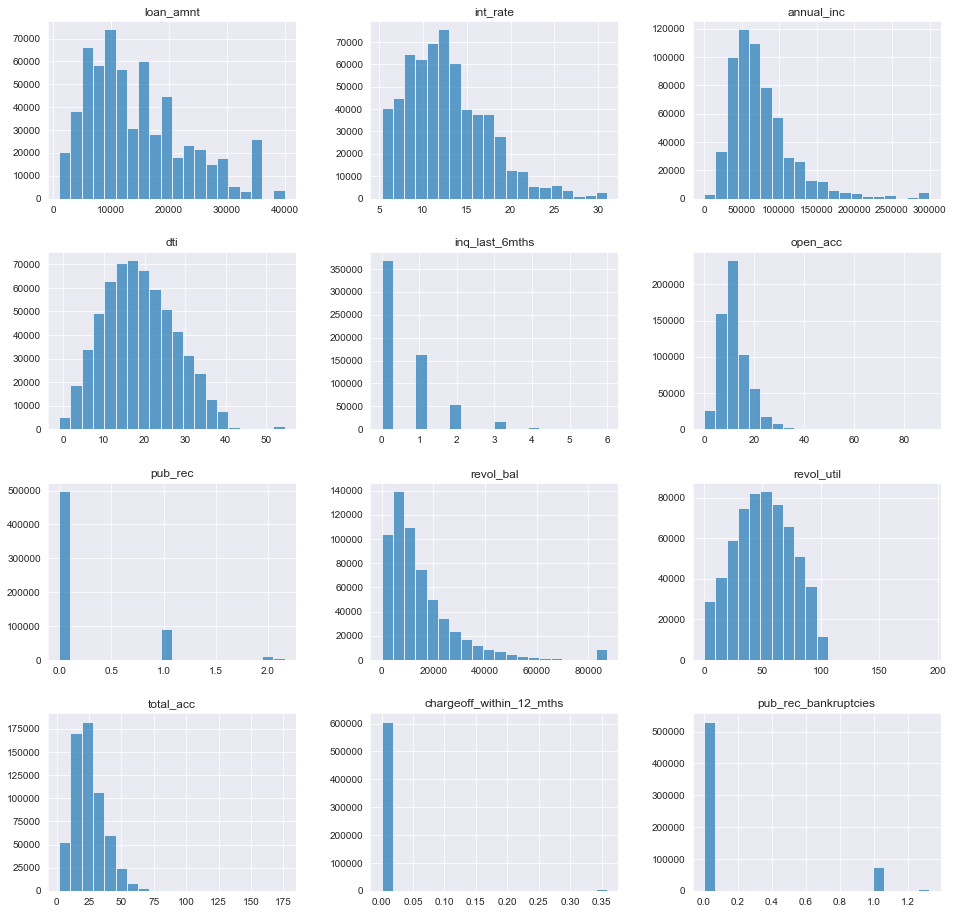

In [28]:
# 观察数值数据分布情况
data.select_dtypes(include=[np.number]).hist(alpha=0.7, figsize=(16,16), bins=20)

## 3. 特征工程

In [29]:
data.select_dtypes(include=[np.number])

,loan_amnt,int_rate,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,chargeoff_within_12_mths,pub_rec_bankruptcies
0,3600.0,13.99,55000.0,5.91,1.0,7.0,0.0,2765.0,29.7,13.0,0.0,0.0
1,24700.0,11.99,65000.0,16.06,4.0,22.0,0.0,21470.0,19.2,38.0,0.0,0.0
2,20000.0,10.78,63000.0,10.78,0.0,6.0,0.0,7869.0,56.2,18.0,0.0,0.0
4,10400.0,22.45,104433.0,25.37,3.0,12.0,0.0,21929.0,64.5,35.0,0.0,0.0
5,11950.0,13.44,34000.0,10.20,0.0,5.0,0.0,8822.0,68.4,6.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,14400.0,16.29,45000.0,33.76,0.0,9.0,0.0,20018.0,65.8,15.0,0.0,0.0
1048571,10000.0,11.47,135000.0,26.41,0.0,22.0,0.0,23617.0,71.1,37.0,0.0,0.0
1048572,16000.0,10.75,70000.0,21.67,0.0,16.0,0.0,45926.0,55.2,30.0,0.0,0.0
1048573,6000.0,7.89,31500.0,25.98,0.0,11.0,0.0,7564.0,27.6,35.0,0.0,0.0


### 数据离散化

In [30]:
# 数字变量
int_cut = ['int_rate','inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 'revol_util','total_acc','pub_rec_bankruptcies', 'dti']
# 金额变量
cash = ['loan_amnt','annual_inc', 'revol_bal']

In [31]:
# 定义对连续变量进行等距离散化的回调函数
def apply_func_discrete(s):
    cut_precision = 2
    if s.name in int_cut:   # 对于计数类的变量，分组边界设置为整数
        cut_precision = 0
    elif s.name in cash:    # 对于大额金额变量，分组边界设置为100的整数倍
        cut_precision = -2
    return pd.cut(s, 10, duplicates='drop', precision=cut_precision)

In [32]:
# 将数值数据离散化
data_num = data.select_dtypes(include=[np.number]).iloc[:,:-2].apply(apply_func_discrete)
data_num.head()

,loan_amnt,int_rate,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,"(1000.0, 4900.0]","(13.0, 16.0]","(30000.0, 60000.0]","(5.0, 10.0]","(0.6, 1.2]","(-0.1, 9.0]","(-0.002, 0.2]","(-100.0, 8700.0]","(19.0, 39.0]","(2.0, 19.0]"
1,"(24400.0, 28300.0]","(10.0, 13.0]","(60000.0, 90000.0]","(16.0, 21.0]","(3.6, 4.2]","(18.0, 27.0]","(-0.002, 0.2]","(17500.0, 26200.0]","(-0.0, 19.0]","(37.0, 54.0]"
2,"(16600.0, 20500.0]","(10.0, 13.0]","(60000.0, 90000.0]","(10.0, 16.0]","(-0.006, 0.6]","(-0.1, 9.0]","(-0.002, 0.2]","(-100.0, 8700.0]","(39.0, 58.0]","(2.0, 19.0]"
4,"(8800.0, 12700.0]","(21.0, 23.0]","(90000.0, 119900.0]","(21.0, 27.0]","(2.4, 3.0]","(9.0, 18.0]","(-0.002, 0.2]","(17500.0, 26200.0]","(58.0, 77.0]","(19.0, 37.0]"
5,"(8800.0, 12700.0]","(13.0, 16.0]","(30000.0, 60000.0]","(10.0, 16.0]","(-0.006, 0.6]","(-0.1, 9.0]","(-0.002, 0.2]","(8700.0, 17500.0]","(58.0, 77.0]","(2.0, 19.0]"


In [33]:
a = data.select_dtypes(include=[np.number]).iloc[:,[-1,-2]]

In [34]:
# 使用离散数据代替原来的连续数据
data_labeled = pd.concat([data.select_dtypes(exclude=[np.number]), data_num], axis=1)


In [35]:
# 观察数据离散化以后的唯一值统计
data_labeled.apply(lambda s: s.nunique())

term                    2
grade                   7
emp_length             11
home_ownership          4
verification_status     3
purpose                14
addr_state             50
loan_status             2
loan_amnt              10
int_rate               10
annual_inc             10
dti                    10
inq_last_6mths          7
open_acc               10
pub_rec                 3
revol_bal              10
revol_util             10
total_acc              10
dtype: int64

<AxesSubplot:xlabel='dti', ylabel='count'>

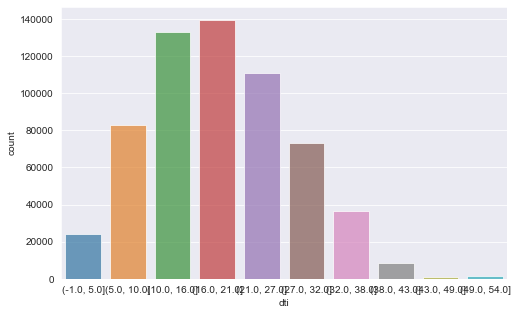

In [36]:
# 观察预测目标数据
sns.countplot(x='dti', data=data_labeled, alpha=0.7)

<AxesSubplot:xlabel='term', ylabel='count'>

<AxesSubplot:xlabel='grade', ylabel='count'>

<AxesSubplot:xlabel='emp_length', ylabel='count'>

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

<AxesSubplot:xlabel='verification_status', ylabel='count'>

<AxesSubplot:xlabel='purpose', ylabel='count'>

<AxesSubplot:xlabel='addr_state', ylabel='count'>

<AxesSubplot:xlabel='loan_status', ylabel='count'>

<AxesSubplot:xlabel='loan_amnt', ylabel='count'>

<AxesSubplot:xlabel='int_rate', ylabel='count'>

<AxesSubplot:xlabel='annual_inc', ylabel='count'>

<AxesSubplot:xlabel='dti', ylabel='count'>

<AxesSubplot:xlabel='inq_last_6mths', ylabel='count'>

<AxesSubplot:xlabel='open_acc', ylabel='count'>

<AxesSubplot:xlabel='pub_rec', ylabel='count'>

<AxesSubplot:xlabel='revol_bal', ylabel='count'>

<AxesSubplot:xlabel='revol_util', ylabel='count'>

<AxesSubplot:xlabel='total_acc', ylabel='count'>

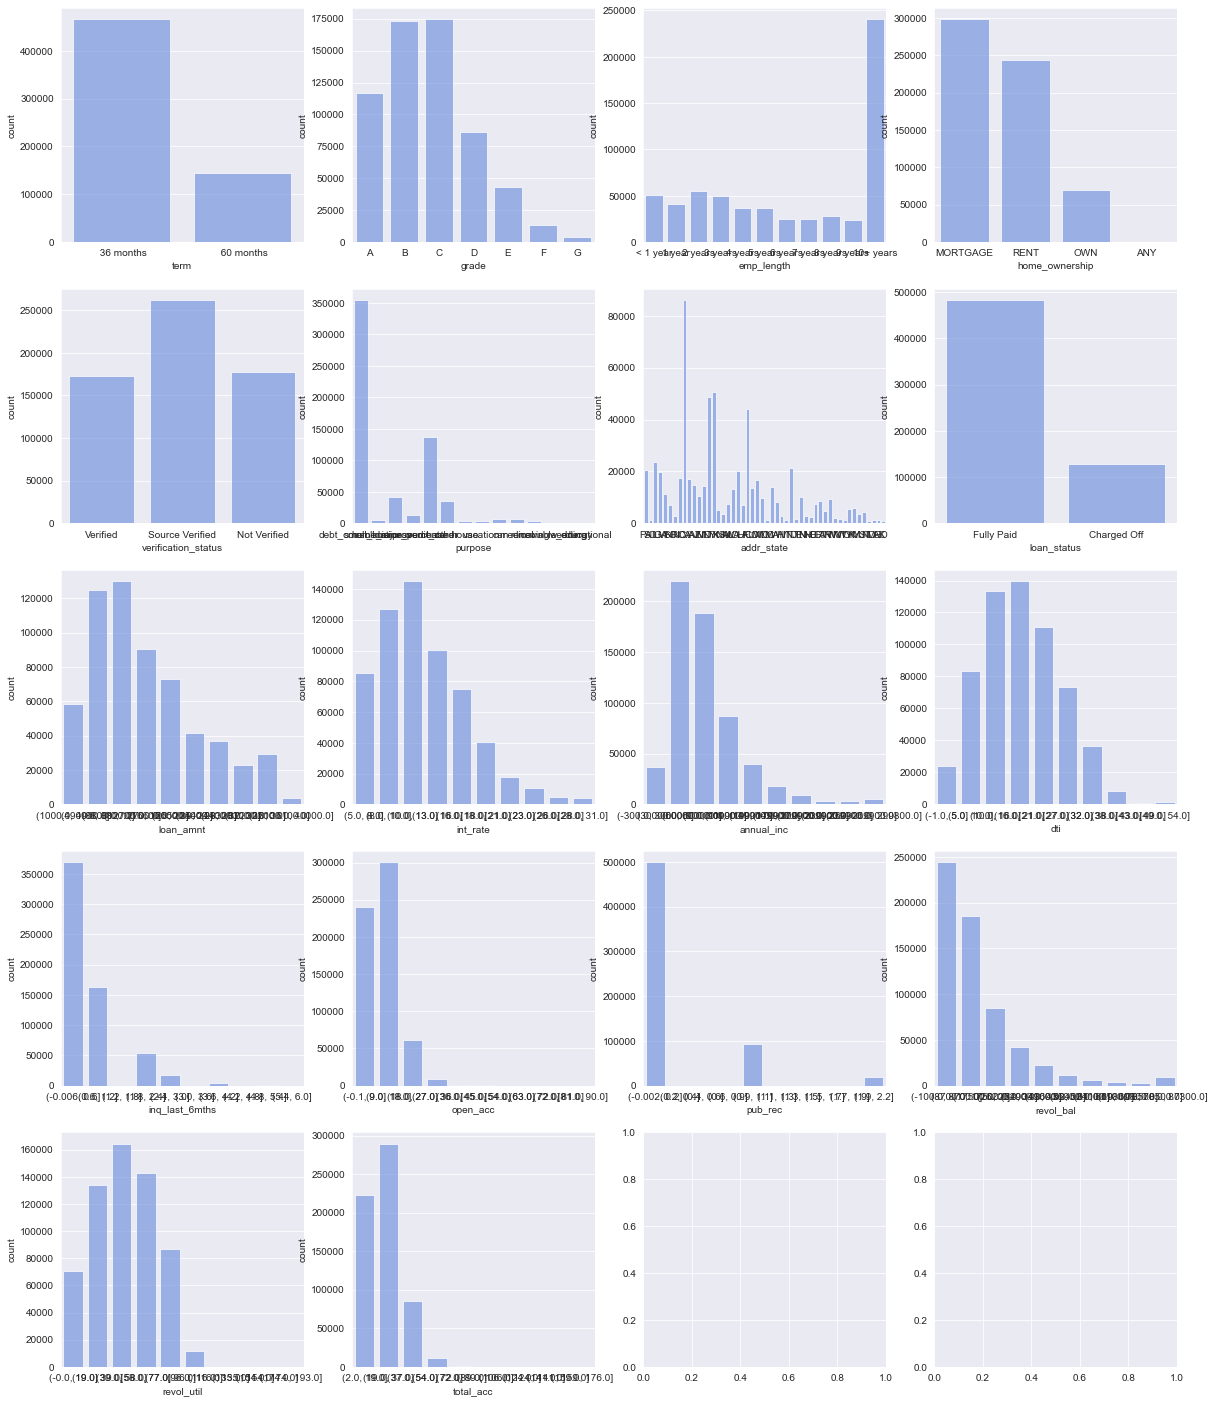

In [37]:
# 观察数值数据分布情况
fig, axes = plt.subplots(5, 4, figsize=(20,25))

column_ax = zip(data_labeled, axes.flatten())

for col, ax in column_ax:
    sns.countplot(x=col, data=data_labeled, ax=ax, color='#6890F0', alpha=0.7)

### 样本合并

In [38]:
def count_samples(df, col: str):
    data = pd.DataFrame(df.groupby(col)[col].count()).rename({col: 'n_samples'}, axis=1)    
    data['column'] = col
    return data

In [39]:
# 测试 count_samples() 函数
count_samples(data_labeled, 'dti')

,n_samples,column
dti,,
"(-1.0, 5.0]",23973,dti
"(5.0, 10.0]",83130,dti
"(10.0, 16.0]",133196,dti
"(16.0, 21.0]",139500,dti
"(21.0, 27.0]",110801,dti
"(27.0, 32.0]",73115,dti
"(32.0, 38.0]",36789,dti
"(38.0, 43.0]",8377,dti
"(43.0, 49.0]",1217,dti


In [40]:
# 统计所有原始分组的样本数量
count_df = pd.concat([count_samples(data_labeled, col) for col in data_labeled]).reset_index().rename({'index': 'group'}, axis=1)
count_df

,group,n_samples,column
0,36 months,466551,term
1,60 months,145231,term
2,A,117025,grade
3,B,173213,grade
4,C,174804,grade
...,...,...,...
188,"(89.0, 106.0]",257,total_acc
189,"(106.0, 124.0]",42,total_acc
190,"(124.0, 141.0]",15,total_acc
191,"(141.0, 159.0]",4,total_acc


In [41]:
# 标记样本量不足30个的分组
# count_df['merge_mark'] = np.where(count_df.n_samples < 30, 0, 1)
count_df['merge_mark'] =count_df.n_samples.apply(lambda x : 0 if x <50 else 1)
count_df

,group,n_samples,column,merge_mark
0,36 months,466551,term,1
1,60 months,145231,term,1
2,A,117025,grade,1
3,B,173213,grade,1
4,C,174804,grade,1
...,...,...,...,...
188,"(89.0, 106.0]",257,total_acc,1
189,"(106.0, 124.0]",42,total_acc,0
190,"(124.0, 141.0]",15,total_acc,0
191,"(141.0, 159.0]",4,total_acc,0


In [42]:
def order_df(df, sort_col):
    """
    根据特征变量属于有序特征或无序特征对df进行排序，对于无序变量，根据分组内部的样本数量对分组进行排序；
    对有序变量，根据数据的索引顺序（与分组的顺序相同）对分组进行排序
    param df: 需要排序的数据表
    param col: 对于无序数据，作为排序标准的列名称
    return：返回根据排序规则排序后的数据表
    """
    unordered_cols = ['home_ownership', 'purpose', 'addr_state']
    df_copy = df.copy()
    col = df_copy['column'].iloc[0]

    if col in unordered_cols:
        return df_copy.sort_values(sort_col, ascending=False)
    else:
        return df_copy.sort_index()
    
def group_merge_mark(df, sort_col):
    """
    apply函数的回调函数，对相同特征变量的分组进行处理，对无序变量，根据样本数量降序排序后对merge_mark累计求和，产生特征变量的分组编号；
    对有序变量，根据原始索引对df进行升序排序后对merge_mark累计求和，产生特征变量的分组编号；
    param df：属于同一特征变量的数据
    return：返回包含merge_group数据的Series
    """
    df_ordered = order_df(df, sort_col)
    df_ordered['merge_group'] = df_ordered.column + '_' + df_ordered.merge_mark.cumsum().astype(str)
    return df_ordered.merge_group


In [43]:
# 分组计算 count_df 中每条数据的 merge_group
count_df['merge_group'] = count_df.groupby('column', group_keys=False).apply(group_merge_mark, sort_col='n_samples')
count_df

,group,n_samples,column,merge_mark,merge_group
0,36 months,466551,term,1,term_1
1,60 months,145231,term,1,term_2
2,A,117025,grade,1,grade_1
3,B,173213,grade,1,grade_2
4,C,174804,grade,1,grade_3
...,...,...,...,...,...
188,"(89.0, 106.0]",257,total_acc,1,total_acc_6
189,"(106.0, 124.0]",42,total_acc,0,total_acc_6
190,"(124.0, 141.0]",15,total_acc,0,total_acc_6
191,"(141.0, 159.0]",4,total_acc,0,total_acc_6


In [147]:
# 检查 merge_group 标记是否正确
count_df[count_df.column == 'annual_inc']

,group,n_samples,column,merge_mark,merge_group,merged_label
113,"(-300.0, 30000.0]",36562,annual_inc,1,annual_inc_1,"(-300.0, 30000.0]"
114,"(30000.0, 60000.0]",219600,annual_inc,1,annual_inc_2,"(30000.0, 60000.0]"
115,"(60000.0, 90000.0]",188681,annual_inc,1,annual_inc_3,"(60000.0, 90000.0]"
116,"(90000.0, 119900.0]",87121,annual_inc,1,annual_inc_4,"(90000.0, 119900.0]"
117,"(119900.0, 149900.0]",39717,annual_inc,1,annual_inc_5,"(119900.0, 149900.0]"
118,"(149900.0, 179900.0]",18476,annual_inc,1,annual_inc_6,"(149900.0, 179900.0]"
119,"(179900.0, 209900.0]",9005,annual_inc,1,annual_inc_7,"(179900.0, 209900.0]"
120,"(209900.0, 239900.0]",3758,annual_inc,1,annual_inc_8,"(209900.0, 239900.0]"
121,"(239900.0, 269900.0]",3100,annual_inc,1,annual_inc_9,"(239900.0, 269900.0]"
122,"(269900.0, 299800.0]",5762,annual_inc,1,annual_inc_10,"(269900.0, 299800.0]"


In [45]:
# 观察所有需要合并的分组是否标记正确
count_df[count_df.merge_mark == 0]

,group,n_samples,column,merge_mark,merge_group
20,ANY,17,home_ownership,0,home_ownership_3
30,educational,1,purpose,0,purpose_12
40,wedding,6,purpose,0,purpose_12
135,"(1.2, 1.8]",0,inq_last_6mths,0,inq_last_6mths_2
138,"(3.0, 3.6]",0,inq_last_6mths,0,inq_last_6mths_4
140,"(4.2, 4.8]",0,inq_last_6mths,0,inq_last_6mths_5
142,"(5.4, 6.0]",42,inq_last_6mths,0,inq_last_6mths_6
149,"(54.0, 63.0]",36,open_acc,0,open_acc_6
150,"(63.0, 72.0]",12,open_acc,0,open_acc_6
151,"(72.0, 81.0]",6,open_acc,0,open_acc_6


In [46]:
def merge_interval(interval_list):
    """
    合并 interval_list 中的区间为一个大区间
    param interval_list: 列表w，其中元素为interval类型数据
    """
    left, right = zip(*[(itv.left, itv.right) for itv in interval_list])
    return pd.Interval(min(left), max(right))

In [47]:
def get_group(s):
    """
    根据传入的Series数据计算合并分组以后的分组值
    param s: 需要合并的分组标签组成的 Series
    return：返回合并以后的分组标签
    """
    if type(s.iloc[0]) == pd._libs.interval.Interval:
        group = merge_interval(s)
    else:
        group = '/'.join(s.astype(str))
    return group

In [48]:
def get_merged_group(df):
    """
    作为回调函数使用，合并df中 merge_group 列相同的行的数据，返回数据合并以后的结果
    param df: 包含 merge_group 分组的数据
    return：返回数据合并以后的数据
    """
    if len(df) == 1:    # 如果分组中只有一条数据，即不需要合并，返回传入的数据
        return df.group
    else:
        group = get_group(df.group)
        s = pd.Series(group, index=df.index)
        return s

In [49]:
# 使用 get_merged_group() 函数计算合并后的分组标签
count_df['merged_label'] = count_df.groupby('merge_group', group_keys=False).apply(get_merged_group)
count_df

,group,n_samples,column,merge_mark,merge_group,merged_label
0,36 months,466551,term,1,term_1,36 months
1,60 months,145231,term,1,term_2,60 months
2,A,117025,grade,1,grade_1,A
3,B,173213,grade,1,grade_2,B
4,C,174804,grade,1,grade_3,C
...,...,...,...,...,...,...
188,"(89.0, 106.0]",257,total_acc,1,total_acc_6,"(89.0, 176.0]"
189,"(106.0, 124.0]",42,total_acc,0,total_acc_6,"(89.0, 176.0]"
190,"(124.0, 141.0]",15,total_acc,0,total_acc_6,"(89.0, 176.0]"
191,"(141.0, 159.0]",4,total_acc,0,total_acc_6,"(89.0, 176.0]"


In [50]:
def get_single_map(df):
    """
    计算单一特征变量的分组标签映射表，作为groupby的回调函数使用
    param df：count_df的子表，按照merge_group列汇总的结果
    return：返回以需要合并的group标签为索引的DataFrame，值为合并后的标签和数据所属的特征变量名称
    """
    if len(df) == 1:
        return None
    else:
        return df.loc[:, ['group', 'column', 'merged_label']].set_index('group')

In [51]:
# 获取所有被合并的分组合并以后的标签映射关系
group_map = count_df.groupby('merge_group', group_keys=False).apply(get_single_map)
group_map

,column,merged_label
group,,
ANY,home_ownership,ANY/OWN
OWN,home_ownership,ANY/OWN
"(0.6, 1.2]",inq_last_6mths,"(0.6, 1.8]"
"(1.2, 1.8]",inq_last_6mths,"(0.6, 1.8]"
"(2.4, 3.0]",inq_last_6mths,"(2.4, 3.6]"
"(3.0, 3.6]",inq_last_6mths,"(2.4, 3.6]"
"(3.6, 4.2]",inq_last_6mths,"(3.6, 4.8]"
"(4.2, 4.8]",inq_last_6mths,"(3.6, 4.8]"
"(4.8, 5.4]",inq_last_6mths,"(4.8, 6.0]"


In [52]:
def replace_value(s, replace_map_df):
    """
    作为apply函数的回调函数使用，将一列数据中的值根据列名和replace_map_df进行替换
    param s: Series类型，代表DataFrame中的一列数据
    param replace_map_df: DataFrame类型，索引为所有需要替换的值，merged_label为替换的目标值，column为替换数据在原数据表中的列名
    return：返回替换后的Series
    """
    col = s.name
    sub_map = replace_map_df.loc[replace_map_df.column == col, 'merged_label']
    return s.replace(sub_map)

In [53]:
sub_map = group_map.loc[group_map.column == data_labeled.total_acc.name, 'merged_label']
sub_map

group
(89.0, 106.0]     (89.0, 176.0]
(106.0, 124.0]    (89.0, 176.0]
(124.0, 141.0]    (89.0, 176.0]
(141.0, 159.0]    (89.0, 176.0]
(159.0, 176.0]    (89.0, 176.0]
Name: merged_label, dtype: object

In [57]:
replace_value(data_labeled.revol_util, group_map)

InvalidIndexError: cannot handle overlapping indices; use IntervalIndex.get_indexer_non_unique

In [ ]:
data_labeled.groupby(by = "total_acc")["total_acc"].count()

In [ ]:
# 测试 replace_values() 函数
replace_value(data_labeled.revol_util, group_map)

In [ ]:
data_labeled.groupby(by = "total_acc")["total_acc"].count()

## WOE 编码

In [58]:
data_labeled.groupby('loan_status').loan_status.count()

loan_status
Charged Off    129187
Fully Paid     482595
Name: loan_status, dtype: int64

In [65]:
# 将好坏样本的数量赋值给变量
ng, nb = 482595, 129187
ng

482595

In [60]:
# 获得一列数据的交叉表
data_labeled.groupby('term').apply(lambda df: df.groupby('loan_status').count()).term

term        loan_status
 36 months  Charged Off     77925
            Fully Paid     388626
 60 months  Charged Off     51262
            Fully Paid      93969
Name: term, dtype: int64

In [61]:
def cross_column(col: str, data_df):
    """
    将data_df中col列的数据分类汇总，并根据 loan_status 列行程交叉表
    param col：代表列名的字符串
    param data_df：原始数据表，DataFrame类型
    """
    table = data_df.groupby(col).apply(lambda df: df.groupby('loan_status').count())[col].unstack()
    table['column'] = table.index.name
    return table

cross_column('term', data_labeled)

loan_status,Charged Off,Fully Paid,column
term,,,
36 months,77925,388626,term
60 months,51262,93969,term


In [62]:
# 对所有列数据进行循环，并将每列数据的形成的交叉表合成为 gouped_table
grouped_table = pd.concat([cross_column(col, data_labeled) for col in data_labeled if col != 'loan_status'])
grouped_table.head(10)

loan_status,Charged Off,Fully Paid,column
36 months,77925.0,388626.0,term
60 months,51262.0,93969.0,term
A,7193.0,109832.0,grade
B,24619.0,148594.0,grade
C,41679.0,133125.0,grade
D,28598.0,57443.0,grade
E,18009.0,24906.0,grade
F,6755.0,6682.0,grade
G,2334.0,2013.0,grade
< 1 year,10946.0,39778.0,emp_length


In [63]:
# 重置grouped_table的索引为整数索引，原分组数据保存在group列中
grouped_table = grouped_table.reset_index().rename({'index': 'group'}, axis=1)
grouped_table

loan_status,group,Charged Off,Fully Paid,column
0,36 months,77925.0,388626.0,term
1,60 months,51262.0,93969.0,term
2,A,7193.0,109832.0,grade
3,B,24619.0,148594.0,grade
4,C,41679.0,133125.0,grade
...,...,...,...,...
176,"(89.0, 106.0]",51.0,206.0,total_acc
177,"(106.0, 124.0]",11.0,31.0,total_acc
178,"(124.0, 141.0]",2.0,13.0,total_acc
179,"(141.0, 159.0]",2.0,2.0,total_acc


In [66]:
# 计算 WoE 
grouped_table['WoE'] = np.log((grouped_table['Fully Paid']/ng) / (grouped_table['Charged Off']/nb))
grouped_table

loan_status,group,Charged Off,Fully Paid,column,WoE
0,36 months,77925.0,388626.0,term,0.288954
1,60 months,51262.0,93969.0,term,-0.711902
2,A,7193.0,109832.0,grade,1.407927
3,B,24619.0,148594.0,grade,0.479782
4,C,41679.0,133125.0,grade,-0.156626
...,...,...,...,...,...
176,"(89.0, 106.0]",51.0,206.0,total_acc,0.078134
177,"(106.0, 124.0]",11.0,31.0,total_acc,-0.281825
178,"(124.0, 141.0]",2.0,13.0,total_acc,0.553885
179,"(141.0, 159.0]",2.0,2.0,total_acc,-1.317917


In [68]:
# #标记需要合并的数据，将需要合并的行的merge_mark标1
grouped_table['merge_mark'] = np.where(grouped_table.WoE.isna(), 0, 1)
grouped_table

loan_status,group,Charged Off,Fully Paid,column,WoE,merge_mark
0,36 months,77925.0,388626.0,term,0.288954,1
1,60 months,51262.0,93969.0,term,-0.711902,1
2,A,7193.0,109832.0,grade,1.407927,1
3,B,24619.0,148594.0,grade,0.479782,1
4,C,41679.0,133125.0,grade,-0.156626,1
...,...,...,...,...,...,...
176,"(89.0, 106.0]",51.0,206.0,total_acc,0.078134,1
177,"(106.0, 124.0]",11.0,31.0,total_acc,-0.281825,1
178,"(124.0, 141.0]",2.0,13.0,total_acc,0.553885,1
179,"(141.0, 159.0]",2.0,2.0,total_acc,-1.317917,1


In [69]:
# 观察需要合并的分组
grouped_table[grouped_table.merge_mark == 0]

loan_status,group,Charged Off,Fully Paid,column,WoE,merge_mark
30,educational,NaN,1.0,purpose,NaN,0
146,"(72.0, 81.0]",NaN,6.0,open_acc,NaN,0
147,"(81.0, 90.0]",NaN,4.0,open_acc,NaN,0


In [70]:
# 对数据表进行深拷贝
woe_filled = grouped_table.copy()

#### 2.3.3. 合并WoE近似的数据组

In [71]:
def get_woe_diff(df):
    """
    判断传入df中column列对应值的类别，如果是无序数据则根据WoE值对数据进行排序，如果有有序值则根据索引进行排序，
    对排序以后的数据进行WoE差分，并将结果加入数据表的WoE_diff列，返回带有WoE_diff的数据表。此函数将作为groupby
    方法的回调函数使用
    param df：DataFrame数据，其中column列应该具有唯一值
    return：DataFrame数据，返回经过排序并计算出WoE_diff的数据表
    """
    df_ordered = order_df(df, 'WoE')
    df_ordered['WoE_diff'] = df_ordered.WoE.diff()
    return df_ordered

In [72]:
# 测试 get_woe_diff() 函数
tmp_df = woe_filled[woe_filled.column == 'emp_length']
get_woe_diff(tmp_df)

loan_status,group,Charged Off,Fully Paid,column,WoE,merge_mark,WoE_diff
9,< 1 year,10946.0,39778.0,emp_length,-0.027577,1,NaN
10,1 year,9060.0,31905.0,emp_length,-0.059023,1,-0.031446
11,2 years,11806.0,43878.0,emp_length,-0.005112,1,0.053912
12,3 years,10470.0,38784.0,emp_length,-0.008423,1,-0.003311
13,4 years,7690.0,28737.0,emp_length,0.000348,1,0.008771
14,5 years,7708.0,29002.0,emp_length,0.007189,1,0.006841
15,6 years,5097.0,19845.0,emp_length,0.041383,1,0.034194
16,7 years,5165.0,19536.0,emp_length,0.012437,1,-0.028946
17,8 years,5952.0,22195.0,emp_length,-0.001777,1,-0.014214
18,9 years,4920.0,18474.0,emp_length,0.005139,1,0.006916


In [73]:
# 计算WoE差值，对于有序数据，按照索引顺序排序后计算WoE差值；对于无序数据，按照WoE排序后计算WoE差值
WoE_diff_table = woe_filled.groupby('column', group_keys=False, sort=False).apply(get_woe_diff)
WoE_diff_table

loan_status,group,Charged Off,Fully Paid,column,WoE,merge_mark,WoE_diff
0,36 months,77925.0,388626.0,term,0.288954,1,NaN
1,60 months,51262.0,93969.0,term,-0.711902,1,-1.000855
2,A,7193.0,109832.0,grade,1.407927,1,NaN
3,B,24619.0,148594.0,grade,0.479782,1,-0.928144
4,C,41679.0,133125.0,grade,-0.156626,1,-0.636408
...,...,...,...,...,...,...,...
176,"(89.0, 106.0]",51.0,206.0,total_acc,0.078134,1,0.282513
177,"(106.0, 124.0]",11.0,31.0,total_acc,-0.281825,1,-0.359959
178,"(124.0, 141.0]",2.0,13.0,total_acc,0.553885,1,0.835710
179,"(141.0, 159.0]",2.0,2.0,total_acc,-1.317917,1,-1.871802


In [74]:
# 计算WoE分组标记
tmp = WoE_diff_table.copy()
tmp['merge_mark'] = np.where(tmp.WoE_diff.abs() < 0.1, 0, 1)
tmp['merge_group'] = tmp.merge_mark.cumsum()
tmp

loan_status,group,Charged Off,Fully Paid,column,WoE,merge_mark,WoE_diff,merge_group
0,36 months,77925.0,388626.0,term,0.288954,1,NaN,1
1,60 months,51262.0,93969.0,term,-0.711902,1,-1.000855,2
2,A,7193.0,109832.0,grade,1.407927,1,NaN,3
3,B,24619.0,148594.0,grade,0.479782,1,-0.928144,4
4,C,41679.0,133125.0,grade,-0.156626,1,-0.636408,5
...,...,...,...,...,...,...,...,...
176,"(89.0, 106.0]",51.0,206.0,total_acc,0.078134,1,0.282513,75
177,"(106.0, 124.0]",11.0,31.0,total_acc,-0.281825,1,-0.359959,76
178,"(124.0, 141.0]",2.0,13.0,total_acc,0.553885,1,0.835710,77
179,"(141.0, 159.0]",2.0,2.0,total_acc,-1.317917,1,-1.871802,78


In [75]:
def merge_group(df):
    """
    作为回调函数使用，合并df中 merge_group 列相同的行的数据，返回数据合并以后的结果
    param df: 包含 merge_group 分组的数据
    return：返回数据合并以后的数据
    """
    if len(df) == 1:    # 如果分组中只有一条数据，即不需要合并，返回传入的数据
        return df
    else:
        data = {'group': get_group(df.group),
                'Charged Off': df['Charged Off'].sum(),
                'Fully Paid': df['Fully Paid'].sum(),
                'column': df.column.iloc[0],                   
               }
        s = pd.DataFrame(data, index=[df.index[0]])
        s['WoE'] = np.log((s['Fully Paid']/ng) / (s['Charged Off']/nb))
        return s

In [76]:
# 测试merge_group()函数
test_df = tmp[tmp.merge_group == 74]
merge_group(test_df)

loan_status,group,Charged Off,Fully Paid,column,WoE,merge_mark,WoE_diff,merge_group
175,"(72.0, 89.0]",399.0,1215.0,total_acc,-0.204379,1,-0.171503,74


In [77]:
def merge_similar_woe(df):
    """
    合并df数据表中WoE值相近的行（相近的标准是WoE差值的绝对值小于0.1）
    param df：原始数据表，包含['group', 'column', 'Charged Off', 'Fully Paid', 'WoE']五列数据
    return：返回合并后的数据表
    """
    WoE_diff_table = df.groupby('column', group_keys=False, sort=True).apply(get_woe_diff)
    WoE_diff_table['merge_mark'] = np.where(WoE_diff_table.WoE_diff.abs() < 0.1, 0, 1)
    columns = WoE_diff_table.columns

    WoE_diff_table['merge_group'] = WoE_diff_table.merge_mark.cumsum()
    result = WoE_diff_table.groupby('merge_group', group_keys=False, sort=True).apply(merge_group)

    WoE_diff_table = result.groupby('column', group_keys=False, sort=True).apply(get_woe_diff)
    WoE_diff_table['merge_mark'] = np.where(WoE_diff_table.WoE_diff.abs() < 0.1, 0, 1)
    return WoE_diff_table.loc[:, columns]

In [78]:
# 测试merge_similar_woe函数
tmp = merge_similar_woe(woe_filled)
tmp

loan_status,group,Charged Off,Fully Paid,column,WoE,merge_mark,WoE_diff
86,VT/OR/ME/DC/NH/WA/CO/SC/WV/MT/UT/KS/CT/WY/RI/I...,129187.0,482595.0,addr_state,0.000000,1,NaN
111,"(-300.0, 30000.0]",9288.0,27274.0,annual_inc,-0.240706,1,NaN
112,"(30000.0, 60000.0]",51567.0,168033.0,annual_inc,-0.136638,1,0.104068
113,"(60000.0, 90000.0]",39710.0,148971.0,annual_inc,0.004232,1,0.140870
114,"(90000.0, 269900.0]",27888.0,133289.0,annual_inc,0.246406,1,0.242175
...,...,...,...,...,...,...,...
179,"(141.0, 159.0]",2.0,2.0,total_acc,-1.317917,1,-1.871802
180,"(159.0, 176.0]",3.0,1.0,total_acc,-2.416529,1,-1.098612
24,Verified,45127.0,127055.0,verification_status,-0.282777,1,NaN
25,Source Verified,56466.0,205272.0,verification_status,-0.027220,1,0.255558


In [79]:
while True:
    tmp = merge_similar_woe(tmp)
    count = tmp.merge_mark[tmp.merge_mark == 0].count()
    if count == 0:
        break

In [80]:
woe_merged = tmp.copy()
woe_merged

loan_status,group,Charged Off,Fully Paid,column,WoE,merge_mark,WoE_diff
86,VT/OR/ME/DC/NH/WA/CO/SC/WV/MT/UT/KS/CT/WY/RI/I...,129187.0,482595.0,addr_state,0.000000,1,NaN
111,"(-300.0, 30000.0]",9288.0,27274.0,annual_inc,-0.240706,1,NaN
112,"(30000.0, 60000.0]",51567.0,168033.0,annual_inc,-0.136638,1,0.104068
113,"(60000.0, 90000.0]",39710.0,148971.0,annual_inc,0.004232,1,0.140870
114,"(90000.0, 269900.0]",27888.0,133289.0,annual_inc,0.246406,1,0.242175
...,...,...,...,...,...,...,...
179,"(141.0, 159.0]",2.0,2.0,total_acc,-1.317917,1,-1.871802
180,"(159.0, 176.0]",3.0,1.0,total_acc,-2.416529,1,-1.098612
24,Verified,45127.0,127055.0,verification_status,-0.282777,1,NaN
25,Source Verified,56466.0,205272.0,verification_status,-0.027220,1,0.255558


In [81]:
woe_merged[woe_merged.merge_mark == 0]

loan_status,group,Charged Off,Fully Paid,column,WoE,merge_mark,WoE_diff


# 4. 特征筛选

### 2.4. IV及特征筛选

IV值解读：


|IV|预测能力|
|:-|:-|
| < 0.02      | 不具备预测能力，应该放弃 |
| 0.02 - 0.1    | 弱预测能力 |
| 0.1 - 0.3      | 中等预测能力 |
| 0.3 - 0.5   | 强预测能力 |
| >0.5    | 结果可疑，需要重新检查 |

In [99]:
woe_merged.head(20)

loan_status,group,Charged Off,Fully Paid,column,WoE,merge_mark,WoE_diff
86,VT/OR/ME/DC/NH/WA/CO/SC/WV/MT/UT/KS/CT/WY/RI/I...,129187.0,482595.0,addr_state,0.000000,1,NaN
111,"(-300.0, 30000.0]",9288.0,27274.0,annual_inc,-0.240706,1,NaN
112,"(30000.0, 60000.0]",51567.0,168033.0,annual_inc,-0.136638,1,0.104068
113,"(60000.0, 90000.0]",39710.0,148971.0,annual_inc,0.004232,1,0.140870
114,"(90000.0, 269900.0]",27888.0,133289.0,annual_inc,0.246406,1,0.242175
120,"(269900.0, 299800.0]",734.0,5028.0,annual_inc,0.606352,1,0.359945
121,"(-1.0, 10.0]",16686.0,90417.0,dti,0.371945,1,NaN
123,"(10.0, 16.0]",23261.0,109935.0,dti,0.235194,1,-0.136751
124,"(16.0, 21.0]",28177.0,111323.0,dti,0.056013,1,-0.179181
125,"(21.0, 27.0]",26134.0,84667.0,dti,-0.142428,1,-0.198441


In [83]:
iv_df = woe_merged.loc[:, ['column', 'group', 'Charged Off', 'Fully Paid', 'WoE']]
iv_df.head()

loan_status,column,group,Charged Off,Fully Paid,WoE
86,addr_state,VT/OR/ME/DC/NH/WA/CO/SC/WV/MT/UT/KS/CT/WY/RI/I...,129187.0,482595.0,0.000000
111,annual_inc,"(-300.0, 30000.0]",9288.0,27274.0,-0.240706
112,annual_inc,"(30000.0, 60000.0]",51567.0,168033.0,-0.136638
113,annual_inc,"(60000.0, 90000.0]",39710.0,148971.0,0.004232
114,annual_inc,"(90000.0, 269900.0]",27888.0,133289.0,0.246406


In [85]:
# 计算分组IV
iv_df['IV'] = (iv_df['Fully Paid']/ng - iv_df['Charged Off']/nb) * iv_df['WoE']
iv_df.head()

loan_status,column,group,Charged Off,Fully Paid,WoE,IV
86,addr_state,VT/OR/ME/DC/NH/WA/CO/SC/WV/MT/UT/KS/CT/WY/RI/I...,129187.0,482595.0,0.000000,0.000000
111,annual_inc,"(-300.0, 30000.0]",9288.0,27274.0,-0.240706,0.003702
112,annual_inc,"(30000.0, 60000.0]",51567.0,168033.0,-0.136638,0.006966
113,annual_inc,"(60000.0, 90000.0]",39710.0,148971.0,0.004232,0.000006
114,annual_inc,"(90000.0, 269900.0]",27888.0,133289.0,0.246406,0.014863


In [86]:
# 计算变量的 IV
iv = iv_df.groupby('column').IV.sum()
iv

column
addr_state             0.000000
annual_inc             0.028409
dti                    0.077156
emp_length             0.000000
grade                  0.527843
home_ownership         0.036867
inq_last_6mths         0.040288
int_rate               0.533315
loan_amnt              0.034064
open_acc               0.004090
pub_rec                0.006201
purpose                0.018066
revol_bal              0.003763
revol_util             0.024148
term                   0.202261
total_acc              0.000198
verification_status    0.061503
Name: IV, dtype: float64

In [87]:
# 筛选IV值大于0.02的
selected_features = iv[iv > 0.02].index
selected_features

Index(['annual_inc', 'dti', 'grade', 'home_ownership', 'inq_last_6mths',
       'int_rate', 'loan_amnt', 'revol_util', 'term', 'verification_status'],
      dtype='object', name='column')

In [88]:
# 筛选出的特征值
features = data.loc[:, selected_features]
features.head()

column,annual_inc,dti,grade,home_ownership,inq_last_6mths,int_rate,loan_amnt,revol_util,term,verification_status
0,55000.0,5.91,C,MORTGAGE,1.0,13.99,3600.0,29.7,36 months,Not Verified
1,65000.0,16.06,C,MORTGAGE,4.0,11.99,24700.0,19.2,36 months,Not Verified
2,63000.0,10.78,B,MORTGAGE,0.0,10.78,20000.0,56.2,60 months,Not Verified
4,104433.0,25.37,F,MORTGAGE,3.0,22.45,10400.0,64.5,60 months,Source Verified
5,34000.0,10.20,C,RENT,0.0,13.44,11950.0,68.4,36 months,Source Verified


#### 2.4.2. 生成原始数据到WoE的映射表

In [89]:
# 获取特征变量的分组映射字典
group_map = woe_merged[woe_merged.column.isin(selected_features)].loc[:, ['group', 'column', 'WoE']]
group_map.set_index('column', inplace=True)
group_map

loan_status,group,WoE
column,,
annual_inc,"(-300.0, 30000.0]",-0.240706
annual_inc,"(30000.0, 60000.0]",-0.136638
annual_inc,"(60000.0, 90000.0]",0.004232
annual_inc,"(90000.0, 269900.0]",0.246406
annual_inc,"(269900.0, 299800.0]",0.606352
dti,"(-1.0, 10.0]",0.371945
dti,"(10.0, 16.0]",0.235194
dti,"(16.0, 21.0]",0.056013
dti,"(21.0, 27.0]",-0.142428


In [90]:
def process_obj_feature_map(df):
    """
    处理非interval类型的特征映射关系，将合并的特征标签展开为单独的特征值
    param df：DataFrame类型，索引为特征值的名称，两列数据分别为group和WoE值
    return：对group标签存在合并的情况，将合并的标签展开为单独的特征值，WoE值与合并的WoE值相同
    """
    result = []
    for idx, (group, woe) in df.iterrows():
        label_list = str(group).split('/')
        for label in label_list:
            result.append((idx, label, woe))
    return pd.DataFrame(result, columns=['column', 'group', 'WoE']).set_index('column')

In [91]:
# 测试process_obj_feature_map()函数
tmp = group_map.loc['grade']
process_obj_feature_map(tmp)

,group,WoE
column,,
grade,A,1.407927
grade,B,0.479782
grade,C,-0.156626
grade,D,-0.620460
grade,E,-0.993680
grade,F,-1.328782
grade,G,-1.465874


In [92]:
def modify_interval(df):
    """
    将df中group列的第一个元素的左边界设置为-inf，最后一个元素的右边界设置为+inf
    param s：Series类型，元素为interval数据，值为经过合并以后的数据标签
    return：返回经过修改的 interval序列
    """
    s = df.loc[:, 'group'].copy()
    s.iloc[0] = pd.Interval(float('-inf'), s.iloc[0].right)
    s.iloc[-1] = pd.Interval(s.iloc[-1].left, float('inf'))
    df_copy = df.copy()
    df_copy['group'] = s
    return df_copy

In [93]:
# 测试 modify_interval() 函数
modify_interval(group_map.loc['int_rate'])

loan_status,group,WoE
column,,
int_rate,"(-inf, 8.0]",1.580406
int_rate,"(8.0, 10.0]",0.721947
int_rate,"(10.0, 13.0]",0.166894
int_rate,"(13.0, 16.0]",-0.246592
int_rate,"(16.0, 18.0]",-0.567967
int_rate,"(18.0, 21.0]",-0.893733
int_rate,"(21.0, 23.0]",-1.049108
int_rate,"(23.0, inf]",-1.240558


In [94]:
# 生成原始数据到WoE值得映射表
modified_group_map = []

for f in features:
    feature_map = group_map.loc[f]
    if type(feature_map.group.iloc[0]) == pd._libs.interval.Interval:
        modified_group_map.append(modify_interval(feature_map))
    else:
        modified_group_map.append(process_obj_feature_map(feature_map))
        
modified_group_map = pd.concat(modified_group_map)
modified_group_map

,group,WoE
column,,
annual_inc,"(-inf, 30000.0]",-0.240706
annual_inc,"(30000.0, 60000.0]",-0.136638
annual_inc,"(60000.0, 90000.0]",0.004232
annual_inc,"(90000.0, 269900.0]",0.246406
annual_inc,"(269900.0, inf]",0.606352
dti,"(-inf, 10.0]",0.371945
dti,"(10.0, 16.0]",0.235194
dti,"(16.0, 21.0]",0.056013
dti,"(21.0, 27.0]",-0.142428


In [95]:
modified_group_map = modified_group_map.set_index('group', append=True).loc[:, 'WoE']
modified_group_map

column               group              
annual_inc           (-inf, 30000.0]       -0.240706
                     (30000.0, 60000.0]    -0.136638
                     (60000.0, 90000.0]     0.004232
                     (90000.0, 269900.0]    0.246406
                     (269900.0, inf]        0.606352
dti                  (-inf, 10.0]           0.371945
                     (10.0, 16.0]           0.235194
                     (16.0, 21.0]           0.056013
                     (21.0, 27.0]          -0.142428
                     (27.0, 32.0]          -0.340777
                     (32.0, 49.0]          -0.525675
                     (49.0, inf]           -0.392463
grade                A                      1.407927
                     B                      0.479782
                     C                     -0.156626
                     D                     -0.620460
                     E                     -0.993680
                     F                     -1.328782
     

In [96]:
def apply_func_woe(s, group_dict):
    """
    apply函数的回调函数，如果s是连续型的特征值，则根据interval_dict将其离散化，否则直接使用group_dict对数据进行映射
    param s: df中的一列数据，对应一个特征的取值
    param group_dict：特征值离散化使用的分段区间字典
    return：返回离散化以后的特征序列
    """
    numerical_features = ['annual_inc', 'inq_last_6mths', 'int_rate', 'revol_util']
    modified_group_map = group_dict.reset_index(level=0, drop=True)
    
    if s.name in numerical_features:
        intervals = pd.cut(s, pd.IntervalIndex(group_dict[s.name].index))
        return intervals.map(modified_group_map)
    else:
        return s.map(modified_group_map) 

In [105]:
# 测试 apply_func_woe()
test = apply_func_woe(features.loc[:, 'annual_inc'], modified_group_map)
test

D:\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


0         -0.136638
1          0.004232
2          0.004232
4          0.246406
5         -0.136638
             ...   
1048570   -0.136638
1048571    0.246406
1048572    0.004232
1048573   -0.136638
1048574    0.004232
Name: annual_inc, Length: 611782, dtype: category
Categories (5, float64): [-0.240706 < -0.136638 < 0.004232 < 0.246406 < 0.606352]

In [110]:
features_coded.dtypes

column
annual_inc             category
dti                     float64
grade                  category
home_ownership          float64
inq_last_6mths         category
int_rate               category
loan_amnt               float64
revol_util             category
term                    float64
verification_status    category
dtype: object

In [106]:
# 将特征值映射为对应的woe编码
features_coded = features.apply(apply_func_woe, group_dict=modified_group_map)
features_coded

column,annual_inc,dti,grade,home_ownership,inq_last_6mths,int_rate,loan_amnt,revol_util,term,verification_status
0,-0.136638,NaN,-0.156626,0.198664,-0.113154,-0.246592,NaN,0.151130,0.288954,0.376905
1,0.004232,NaN,-0.156626,0.198664,-0.534482,0.166894,NaN,0.151130,0.288954,0.376905
2,0.004232,NaN,0.479782,0.198664,0.151778,0.166894,NaN,-0.099165,-0.711902,0.376905
4,0.246406,NaN,-1.328782,0.198664,-0.534482,-1.049108,NaN,-0.099165,-0.711902,-0.027220
5,-0.136638,NaN,-0.156626,-0.209998,0.151778,-0.246592,NaN,-0.099165,0.288954,-0.027220
...,...,...,...,...,...,...,...,...,...,...
1048570,-0.136638,NaN,-0.620460,-0.209998,0.151778,-0.567967,NaN,-0.099165,0.288954,0.376905
1048571,0.246406,NaN,0.479782,0.198664,0.151778,0.166894,NaN,-0.099165,0.288954,0.376905
1048572,0.004232,NaN,0.479782,0.198664,0.151778,0.166894,NaN,-0.099165,0.288954,-0.027220
1048573,-0.136638,NaN,1.407927,0.198664,0.151778,1.580406,NaN,0.151130,0.288954,-0.027220


In [108]:
features_coded.groupby("dti")["dti"].count()

Series([], Name: dti, dtype: int64)

#### 2.4.4. 分析特征相关性

Pearson相关系数：


|abs(r)|相关性强弱|
|:-|:-|
| [0, 0.3]     | 不存在线性相关|
| (0.3, 0.5]    | 弱线性相关性 |
| (0.5, 0.8]    | 显著线性相关性 |
| (0.8, 1]   | 强线性相关性 |


In [102]:
# 计算数值数据的相关系数
corr = features_coded.corr()
corr

column,dti,home_ownership,loan_amnt,term
column,,,,
dti,NaN,NaN,NaN,NaN
home_ownership,NaN,1.000000,NaN,-0.093984
loan_amnt,NaN,NaN,NaN,NaN
term,NaN,-0.093984,NaN,1.000000


<Figure size 720x504 with 0 Axes>

<AxesSubplot:xlabel='column', ylabel='column'>

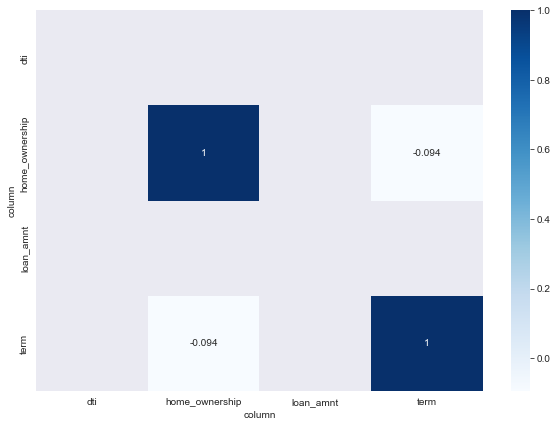

In [104]:
# 计算数值数据的相关系数
corr = features_coded.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap='Blues')

In [111]:
data_final = pd.read_csv("data_output.csv")

In [115]:
data_final.groupby("loan_status")['loan_status'].count()

loan_status
Charged Off    129187
Fully Paid     482595
Name: loan_status, dtype: int64

In [114]:
# 提取对应的数据标签
labels = data_final.loc[:, 'loan_status']
labels.head()

0    Fully Paid
1    Fully Paid
2    Fully Paid
3    Fully Paid
4    Fully Paid
Name: loan_status, dtype: object

In [116]:
# 将标签值映射为0，1
labels = labels.map({'Fully Paid': 0, 'Charged Off': 1})
labels.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [117]:
# 观察违约比例
labels.sum() / len(labels)

0.21116508821769847

In [118]:
from sklearn.model_selection import train_test_split

In [128]:
features_coded.head()

column,annual_inc,dti,grade,home_ownership,inq_last_6mths,int_rate,loan_amnt,revol_util,term,verification_status
0,-0.136638,NaN,-0.156626,0.198664,-0.113154,-0.246592,NaN,0.151130,0.288954,0.376905
1,0.004232,NaN,-0.156626,0.198664,-0.534482,0.166894,NaN,0.151130,0.288954,0.376905
2,0.004232,NaN,0.479782,0.198664,0.151778,0.166894,NaN,-0.099165,-0.711902,0.376905
4,0.246406,NaN,-1.328782,0.198664,-0.534482,-1.049108,NaN,-0.099165,-0.711902,-0.027220
5,-0.136638,NaN,-0.156626,-0.209998,0.151778,-0.246592,NaN,-0.099165,0.288954,-0.027220


In [127]:
features_coded.dtypes

column
annual_inc             category
dti                     float64
grade                  category
home_ownership          float64
inq_last_6mths         category
int_rate               category
loan_amnt               float64
revol_util             category
term                    float64
verification_status    category
dtype: object

In [137]:
data.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,chargeoff_within_12_mths,pub_rec_bankruptcies,loan_status
0,3600.0,36 months,13.99,C,10+ years,MORTGAGE,55000.0,Not Verified,debt_consolidation,PA,5.91,1.0,7.0,0.0,2765.0,29.7,13.0,0.0,0.0,Fully Paid
1,24700.0,36 months,11.99,C,10+ years,MORTGAGE,65000.0,Not Verified,small_business,SD,16.06,4.0,22.0,0.0,21470.0,19.2,38.0,0.0,0.0,Fully Paid
2,20000.0,60 months,10.78,B,10+ years,MORTGAGE,63000.0,Not Verified,home_improvement,IL,10.78,0.0,6.0,0.0,7869.0,56.2,18.0,0.0,0.0,Fully Paid
4,10400.0,60 months,22.45,F,3 years,MORTGAGE,104433.0,Source Verified,major_purchase,PA,25.37,3.0,12.0,0.0,21929.0,64.5,35.0,0.0,0.0,Fully Paid
5,11950.0,36 months,13.44,C,4 years,RENT,34000.0,Source Verified,debt_consolidation,GA,10.20,0.0,5.0,0.0,8822.0,68.4,6.0,0.0,0.0,Fully Paid


In [143]:
predictors = data.loc[:,['annual_inc','grade','inq_last_6mths',
                       'grade','revol_util','term','loan_amnt']]

In [144]:
X_train, X_test, y_train, y_test = train_test_split(predictors, labels, test_size=0.2, random_state=42)

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [145]:
# 模型训练
clf = LogisticRegression(class_weight='balanced').fit(X_train, y_train)

ValueError: could not convert string to float: 'B'

In [146]:
data_final

,Unnamed: 0,term,grade,emp_length,home_ownership,verification_status,purpose,addr_state,loan_status,loan_amnt,int_rate,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,0,36 months,C,10+ years,MORTGAGE,Not Verified,debt_consolidation,PA,Fully Paid,"(1000.0, 4900.0]","(13.0, 16.0]","(30000.0, 60000.0]","(5.0, 10.0]","(0.6, 1.2]","(-0.1, 9.0]","(-0.002, 0.2]","(-100.0, 8700.0]","(19.0, 39.0]","(2.0, 19.0]"
1,1,36 months,C,10+ years,MORTGAGE,Not Verified,small_business,SD,Fully Paid,"(24400.0, 28300.0]","(10.0, 13.0]","(60000.0, 90000.0]","(16.0, 21.0]","(3.6, 4.2]","(18.0, 27.0]","(-0.002, 0.2]","(17500.0, 26200.0]","(-0.0, 19.0]","(37.0, 54.0]"
2,2,60 months,B,10+ years,MORTGAGE,Not Verified,home_improvement,IL,Fully Paid,"(16600.0, 20500.0]","(10.0, 13.0]","(60000.0, 90000.0]","(10.0, 16.0]","(-0.006, 0.6]","(-0.1, 9.0]","(-0.002, 0.2]","(-100.0, 8700.0]","(39.0, 58.0]","(2.0, 19.0]"
3,4,60 months,F,3 years,MORTGAGE,Source Verified,major_purchase,PA,Fully Paid,"(8800.0, 12700.0]","(21.0, 23.0]","(90000.0, 119900.0]","(21.0, 27.0]","(2.4, 3.0]","(9.0, 18.0]","(-0.002, 0.2]","(17500.0, 26200.0]","(58.0, 77.0]","(19.0, 37.0]"
4,5,36 months,C,4 years,RENT,Source Verified,debt_consolidation,GA,Fully Paid,"(8800.0, 12700.0]","(13.0, 16.0]","(30000.0, 60000.0]","(10.0, 16.0]","(-0.006, 0.6]","(-0.1, 9.0]","(-0.002, 0.2]","(8700.0, 17500.0]","(58.0, 77.0]","(2.0, 19.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611777,1048570,36 months,D,10+ years,RENT,Not Verified,credit_card,PA,Charged Off,"(12700.0, 16600.0]","(16.0, 18.0]","(30000.0, 60000.0]","(32.0, 38.0]","(-0.006, 0.6]","(-0.1, 9.0]","(-0.002, 0.2]","(17500.0, 26200.0]","(58.0, 77.0]","(2.0, 19.0]"
611778,1048571,36 months,B,10+ years,MORTGAGE,Not Verified,debt_consolidation,WA,Fully Paid,"(8800.0, 12700.0]","(10.0, 13.0]","(119900.0, 149900.0]","(21.0, 27.0]","(-0.006, 0.6]","(18.0, 27.0]","(-0.002, 0.2]","(17500.0, 26200.0]","(58.0, 77.0]","(37.0, 54.0]"
611779,1048572,36 months,B,< 1 year,MORTGAGE,Source Verified,debt_consolidation,NC,Fully Paid,"(12700.0, 16600.0]","(10.0, 13.0]","(60000.0, 90000.0]","(21.0, 27.0]","(-0.006, 0.6]","(9.0, 18.0]","(-0.002, 0.2]","(43600.0, 52400.0]","(39.0, 58.0]","(19.0, 37.0]"
611780,1048573,36 months,A,6 years,MORTGAGE,Source Verified,debt_consolidation,MS,Fully Paid,"(4900.0, 8800.0]","(8.0, 10.0]","(30000.0, 60000.0]","(21.0, 27.0]","(-0.006, 0.6]","(9.0, 18.0]","(-0.002, 0.2]","(-100.0, 8700.0]","(19.0, 39.0]","(19.0, 37.0]"
